# BASICS OF PYTHON | SESSION 3&4

---
Sina Shafiezadeh | October 2024
---


In these two sessions, we are going to work with a fake dataset about BMI scores in **10 steps** and **20 exercises**.

# 1.&nbsp;Data Importing

In [2]:
# import packages
import pandas as pd
import numpy as np

In [3]:
# import dataset (method 1): upload from the local machine
# from google.colab import files

# uploaded = files.upload()
# filename = next(iter(uploaded)) # get the uploaded file name

# data = pd.read_csv(filename)

In [4]:
# import dataset (method 2): upload from the google drive
# from google.colab import drive
# drive.mount('/content/drive')
# data = pd.read_csv('drive/MyDrive/bmi.csv')

In [5]:
# import dataset (method 3): download from a URL directly
import requests
url = "https://raw.githubusercontent.com/sina-shafiezadeh/Basics-of-Python-course/main/bmi.csv" # click on the "Raw" button to get the direct link to the raw file
response = requests.get(url)
open('bmi.csv', 'wb').write(response.content)
data = pd.read_csv('bmi.csv')

# 2.&nbsp;Data Cleaning (overview)

In [6]:
print(data)

     sex   city   age   bmi  bmi_score  pet  sport  time
0      f      3  25.4  34.1       34.1    0   2676  2023
1      f      1  19.9  22.4       22.4    1   3006  2023
2      f  city2  21.3  17.0       17.0    1   2303  2023
3    NaN      1  23.0  17.6       17.6    0   3073  2023
4      f      1  15.0  17.6       17.6    1   3858  2023
..   ...    ...   ...   ...        ...  ...    ...   ...
287    f      3  16.1  20.8       20.8    1   3280  2023
288    f      1  30.6  29.8       29.8    0     14  2023
289  NaN      2  33.1  24.5       24.5    0   1188  2023
290    m  city2  29.0  24.2       24.2    0    487  2023
291    m      1  35.6  27.6       27.6    1   1916  2023

[292 rows x 8 columns]


In [7]:
print(data.shape)

(292, 8)


In [8]:
print(data.size) # rows*columns

2336


In [9]:
print(data.head(5)) # first 5 rows

   sex   city   age   bmi  bmi_score  pet  sport  time
0    f      3  25.4  34.1       34.1    0   2676  2023
1    f      1  19.9  22.4       22.4    1   3006  2023
2    f  city2  21.3  17.0       17.0    1   2303  2023
3  NaN      1  23.0  17.6       17.6    0   3073  2023
4    f      1  15.0  17.6       17.6    1   3858  2023


In [10]:
print(data.tail(5)) # last 5 rows

     sex   city   age   bmi  bmi_score  pet  sport  time
287    f      3  16.1  20.8       20.8    1   3280  2023
288    f      1  30.6  29.8       29.8    0     14  2023
289  NaN      2  33.1  24.5       24.5    0   1188  2023
290    m  city2  29.0  24.2       24.2    0    487  2023
291    m      1  35.6  27.6       27.6    1   1916  2023


In [11]:
print(data.info()) # shape, names, count, data type and memory info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        288 non-null    object 
 1   city       292 non-null    object 
 2   age        292 non-null    float64
 3   bmi        289 non-null    float64
 4   bmi_score  289 non-null    float64
 5   pet        292 non-null    int64  
 6   sport      292 non-null    int64  
 7   time       292 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 18.4+ KB
None


In [12]:
print(data.describe()) # description for numerical columns

              age         bmi   bmi_score         pet         sport  \
count  292.000000  289.000000  289.000000  292.000000    292.000000   
mean    31.565068   28.693772   28.693772    0.510274   3936.763699   
std      9.637659    7.599431    7.599431    0.500753   5741.682983   
min     12.300000   16.000000   16.000000    0.000000     14.000000   
25%     24.250000   22.400000   22.400000    0.000000   1742.000000   
50%     31.400000   27.900000   27.900000    1.000000   3506.000000   
75%     38.625000   35.200000   35.200000    1.000000   5197.000000   
max     56.500000   42.000000   42.000000    1.000000  72135.000000   

              time  
count   292.000000  
mean   2022.982877  
std       0.292603  
min    2018.000000  
25%    2023.000000  
50%    2023.000000  
75%    2023.000000  
max    2023.000000  


In [13]:
# description for categorical columns
print(data['sex'].value_counts())
print("============================")
print(data['city'].value_counts())

sex
f    174
m    114
Name: count, dtype: int64
city
1        117
3         77
city2     60
2         25
city1     13
Name: count, dtype: int64


# 3.&nbsp;Data Cleaning (interpretability)

As much as possible, we should reduce **complexity** and increase **consistency**.

## Exercise 1

---


Change the values of "sport" time from seconds to minutes.


*   Example: 2676 (second) = 44.6 (minute)


In [14]:
# replace the new value in the column
# run once

for sp in range(len(data["sport"])):
    data.loc[sp, "sport"] = round((data["sport"][sp] / 60), 3)



print(data)

     sex   city   age   bmi  bmi_score  pet   sport  time
0      f      3  25.4  34.1       34.1    0  44.600  2023
1      f      1  19.9  22.4       22.4    1  50.100  2023
2      f  city2  21.3  17.0       17.0    1  38.383  2023
3    NaN      1  23.0  17.6       17.6    0  51.217  2023
4      f      1  15.0  17.6       17.6    1  64.300  2023
..   ...    ...   ...   ...        ...  ...     ...   ...
287    f      3  16.1  20.8       20.8    1  54.667  2023
288    f      1  30.6  29.8       29.8    0   0.233  2023
289  NaN      2  33.1  24.5       24.5    0  19.800  2023
290    m  city2  29.0  24.2       24.2    0   8.117  2023
291    m      1  35.6  27.6       27.6    1  31.933  2023

[292 rows x 8 columns]


C:\Users\hiren\AppData\Local\Temp\ipykernel_24892\1822442284.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '44.6' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[sp, "sport"] = round((data["sport"][sp] / 60), 3)


## Exercise 2

---


Change the values in "city" from string to integer.


*   Example: city2 = 2


In [15]:
# replace the new value in the column
data2 = data.copy()

# for c in range(len(data2["city"])):
#     if((data2["city"][c]).startswith("city")):
#         data2.loc[c, "city"] = int(data2["city"][c][-1])
#         continue
#     data2.loc[c, "city"] = int(data2["city"][c])


data2["city"] = data2["city"].apply(lambda x: int(x[-1]) if x.startswith("city") else int(x))

print(data2)

     sex  city   age   bmi  bmi_score  pet   sport  time
0      f     3  25.4  34.1       34.1    0  44.600  2023
1      f     1  19.9  22.4       22.4    1  50.100  2023
2      f     2  21.3  17.0       17.0    1  38.383  2023
3    NaN     1  23.0  17.6       17.6    0  51.217  2023
4      f     1  15.0  17.6       17.6    1  64.300  2023
..   ...   ...   ...   ...        ...  ...     ...   ...
287    f     3  16.1  20.8       20.8    1  54.667  2023
288    f     1  30.6  29.8       29.8    0   0.233  2023
289  NaN     2  33.1  24.5       24.5    0  19.800  2023
290    m     2  29.0  24.2       24.2    0   8.117  2023
291    m     1  35.6  27.6       27.6    1  31.933  2023

[292 rows x 8 columns]


## Exercise 3

---


We don't need too less or too much accuracy. Remove one decimal place in the "age" value by rounding  them.


*   Example: 19.9 = 20


In [16]:
# replace the new value in the column
data2["age"] = data2["age"].apply(lambda x: round(x))

# data2["age"] = round(data2["age"])

print(data2)

     sex  city  age   bmi  bmi_score  pet   sport  time
0      f     3   25  34.1       34.1    0  44.600  2023
1      f     1   20  22.4       22.4    1  50.100  2023
2      f     2   21  17.0       17.0    1  38.383  2023
3    NaN     1   23  17.6       17.6    0  51.217  2023
4      f     1   15  17.6       17.6    1  64.300  2023
..   ...   ...  ...   ...        ...  ...     ...   ...
287    f     3   16  20.8       20.8    1  54.667  2023
288    f     1   31  29.8       29.8    0   0.233  2023
289  NaN     2   33  24.5       24.5    0  19.800  2023
290    m     2   29  24.2       24.2    0   8.117  2023
291    m     1   36  27.6       27.6    1  31.933  2023

[292 rows x 8 columns]


# 4.&nbsp;Data Cleaning (reduction)

Remove duplicate or unnecessary columns.

## Exercise 4

---


Remove the same value with a different column name (bmi_score) and the unrelated column for our analyzing goal (pet).

In [17]:
# we should have 6 columns after removing
data2.drop(data2.columns[[4,5]], axis=1, inplace=True)

print(data2)

     sex  city  age   bmi   sport  time
0      f     3   25  34.1  44.600  2023
1      f     1   20  22.4  50.100  2023
2      f     2   21  17.0  38.383  2023
3    NaN     1   23  17.6  51.217  2023
4      f     1   15  17.6  64.300  2023
..   ...   ...  ...   ...     ...   ...
287    f     3   16  20.8  54.667  2023
288    f     1   31  29.8   0.233  2023
289  NaN     2   33  24.5  19.800  2023
290    m     2   29  24.2   8.117  2023
291    m     1   36  27.6  31.933  2023

[292 rows x 6 columns]


In [18]:
# NOTE: access items in a list by multiple indices

arr = np.array(['Name', 'Age', 'Gender', 'Address', 'City', 'Country'])
selected = arr[[4, 5]]
print(selected)

['City' 'Country']


# 5.&nbsp;Data Cleaning (noisy data)

Noisy data is all the data we don't want. It does not matter whether it is corrupted or meaningless for our analysis.

## Exercise 5

---


we don't need data that is not **timeliness**. Remove the older data.

In [19]:
# Hint: check the "time" column
data = data[data["time"] != 2018]

print(data)

     sex   city   age   bmi  bmi_score  pet   sport  time
0      f      3  25.4  34.1       34.1    0  44.600  2023
1      f      1  19.9  22.4       22.4    1  50.100  2023
2      f  city2  21.3  17.0       17.0    1  38.383  2023
3    NaN      1  23.0  17.6       17.6    0  51.217  2023
4      f      1  15.0  17.6       17.6    1  64.300  2023
..   ...    ...   ...   ...        ...  ...     ...   ...
287    f      3  16.1  20.8       20.8    1  54.667  2023
288    f      1  30.6  29.8       29.8    0   0.233  2023
289  NaN      2  33.1  24.5       24.5    0  19.800  2023
290    m  city2  29.0  24.2       24.2    0   8.117  2023
291    m      1  35.6  27.6       27.6    1  31.933  2023

[291 rows x 8 columns]


## Exercise 6

---


It is essential that the data be **believable**. Check suspicious values and decide about them.

In [20]:
# Hint: check the "sport" column
data.sort_values("sport", axis=0, ascending=False)


,sex,city,age,bmi,bmi_score,pet,sport,time
217,m,city2,30.8,32.6,32.6,1,1202.250,2023
259,m,1,38.7,37.3,37.3,0,1074.817,2023
134,f,3,31.1,25.1,25.1,1,119.267,2023
9,m,3,39.5,29.8,29.8,0,119.267,2023
68,f,1,18.2,22.3,22.3,0,119.017,2023
...,...,...,...,...,...,...,...,...
218,f,1,25.7,26.6,26.6,0,0.983,2023
149,f,3,25.9,22.8,22.8,0,0.933,2023
166,m,3,29.6,23.8,23.8,0,0.883,2023
210,f,city2,44.8,41.4,41.4,1,0.450,2023


## Exercise 7

---


We don't need people under the age of 18 in this analysis. Be careful, it is possible that noisy data may not be noisy in another analysis.

In [21]:
# remove the unnecessary rows
data = data[data["age"] > 18]
print(data)


     sex   city   age   bmi  bmi_score  pet   sport  time
0      f      3  25.4  34.1       34.1    0  44.600  2023
1      f      1  19.9  22.4       22.4    1  50.100  2023
2      f  city2  21.3  17.0       17.0    1  38.383  2023
3    NaN      1  23.0  17.6       17.6    0  51.217  2023
5      f      3  48.7  39.6       39.6    0  41.033  2023
..   ...    ...   ...   ...        ...  ...     ...   ...
286    f  city2  56.5  39.4       39.4    0  70.400  2023
288    f      1  30.6  29.8       29.8    0   0.233  2023
289  NaN      2  33.1  24.5       24.5    0  19.800  2023
290    m  city2  29.0  24.2       24.2    0   8.117  2023
291    m      1  35.6  27.6       27.6    1  31.933  2023

[264 rows x 8 columns]


# 6.&nbsp;Data Cleaning (completeness)



We can **replace** values with nan values or **remove** them if we have enough data. In addition, based on our need for handling noisy data, we can select from several techniques to deal with it.

## Exercise 8

---


Replace the mean value with nan values in the "bmi" column. Be careful, manual replacement could need a lot of time and cause human mistakes.

In [22]:
# calculate the bmi mean over all nan values first.
data["bmi"] = data["bmi"].fillna(data["bmi"].mean())
# data["bmi_score"] = data["bmi"].fillna(data["bmi_score"].mean())

data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, 0 to 291
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        260 non-null    object 
 1   city       264 non-null    object 
 2   age        264 non-null    float64
 3   bmi        264 non-null    float64
 4   bmi_score  261 non-null    float64
 5   pet        264 non-null    int64  
 6   sport      264 non-null    float64
 7   time       264 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 18.6+ KB


## Exercise 9

---


Remove nan values in the "sex" column.

In [23]:
# we should have 3 nan values in the sex column
data = data[data["sex"].notnull()]

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 0 to 291
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        260 non-null    object 
 1   city       260 non-null    object 
 2   age        260 non-null    float64
 3   bmi        260 non-null    float64
 4   bmi_score  257 non-null    float64
 5   pet        260 non-null    int64  
 6   sport      260 non-null    float64
 7   time       260 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 18.3+ KB


# 7.&nbsp;Data Exploring



We can define different scenarios as we need.

## Exercise 10

---


Select rows where **city = 1**, **bmi > 25**, and **sport <= 60**.

In [24]:
# store results in the new data frame with the name "selected_data"
selected_data = data[(data['city'] == "1") & (data['bmi'] > 25) & (data['sport'] <= 60)]
print(selected_data)


    sex city   age   bmi  bmi_score  pet   sport  time
11    f    1  50.1  41.9       41.9    1  20.200  2023
15    m    1  34.8  41.5       41.5    1  27.300  2023
20    f    1  25.8  31.8       31.8    0  50.833  2023
28    f    1  35.5  41.2       41.2    1  28.850  2023
32    f    1  35.8  31.4       31.4    0  47.617  2023
36    f    1  35.7  25.1       25.1    1  12.883  2023
38    f    1  31.4  32.6       32.6    1  59.500  2023
48    m    1  27.9  27.2       27.2    0  37.433  2023
49    m    1  29.5  29.6       29.6    0   8.433  2023
104   m    1  43.5  40.9       40.9    1  55.667  2023
108   m    1  41.8  29.9       29.9    0  28.583  2023
137   f    1  42.4  40.1       40.1    1  29.283  2023
145   f    1  38.6  25.5       25.5    1  39.450  2023
148   f    1  28.4  25.5       25.5    0  51.300  2023
151   f    1  33.2  33.7       33.7    0  34.783  2023
153   f    1  34.6  29.6       29.6    1  38.550  2023
163   f    1  42.9  34.7       34.7    0  18.750  2023
168   f   

## Exercise 11

---


Sort **females in age 18 to 30** by **sport** in descending order.

In [25]:
# Hint: check the "sort_values" function
sorted_females = (data[(data["sex"] == 'f') & (data["age"] >= 18) & (data["age"] <= 30)]).sort_values("sport", ascending=False)

sorted_females.shape


(54, 8)

## Exercise 12

---


Which city has the **highest** and which city has the **lowest** average BMI score?

In [26]:
# Hint: returns the mean of the values in "bmi", grouped by the values in "city"

city_mean = data2.groupby("city")["bmi"].mean()
print(f"Highest avg bmi: city {city_mean.idxmax()}")
print(f"Lowest avg bmi: city {city_mean.idxmin()}")

Highest avg bmi: city 3
Lowest avg bmi: city 1


# 8.&nbsp;Data Analysis

## Exercise 13

---


Which attributes are **correlated**?

In [27]:
# Hint: check "corr()" function
numeric_data = data2.select_dtypes(include=['float64', 'int64'])
correlated_data = numeric_data.corr().round(2)
print(correlated_data)



       city   age   bmi  sport  time
city   1.00  0.16  0.16  -0.05 -0.01
age    0.16  1.00  0.79   0.01  0.05
bmi    0.16  0.79  1.00   0.04  0.06
sport -0.05  0.01  0.04   1.00  0.01
time  -0.01  0.05  0.06   0.01  1.00


## Exercise 14

---


Is the difference in BMI scores between **men and women** statistically **significant**?

Firstly, define a function to calculate the statistic test and then use it to answer the question.

Note: you can access the API for suitable statistical tests [HERE](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html).

In [28]:
# Hint 1: import "SciPy" library and implement student's t-test by "scipy.stats.t"
# Hint 2: if the variance ratio is less than 4:1, so the variance is equal.
from scipy import stats

def t_test_bmi(group1_bmi, group2_bmi):
    var_men = np.var(group1_bmi, ddof=1)
    var_women = np.var(group2_bmi, ddof=1)

    var_ratio = var_men / var_women if var_men > var_women else var_women / var_men

    if var_ratio < 4:
        t_stat, p_val = stats.ttest_ind(group1_bmi, group2_bmi, equal_var=True)
        test_type = "t-test (equal variance)"
    else:
        t_stat, p_val = stats.ttest_ind(group1_bmi, group2_bmi, equal_var=False)
        test_type = "t-test (unequal variance)"

    return t_stat, p_val, test_type


men_bmi = data[data["sex"] == 'm']["bmi"]
women_bmi = data[data["sex"] == 'f']["bmi"]

t_stat, p_val, test_type = t_test_bmi(men_bmi, women_bmi)

print(f"{test_type}:\n t-stat: {t_stat}\n p-value: {p_val}")

# Anova test - cities
city1 = data2[data2["city"] == 1]["bmi"].dropna()
city2 = data2[data2["city"] == 2]["bmi"].dropna()
city3 = data2[data2["city"] == 3]["bmi"].dropna()

get_anova_t = lambda *groups: stats.f_oneway(*groups)

anova_res = stats.f_oneway(city1, city2, city3)

print(f"statistic={anova_res.statistic}, pvalue={anova_res.pvalue}")


t-test (equal variance):
 t-stat: -0.12505426518232376
 p-value: 0.9005779742624329
statistic=3.9853984945530807, pvalue=0.019626533247105442


## Exercise 15

---


Is the difference in BMI scores of ages between **18 to 25** and age between **45 to 55** statistically **significant**?

*   Expected output:

        pvalue = 5.900678573659376e-26

In [29]:
# use the previous function
young = data[(data["age"] > 18) & (data["age"] < 25)]["bmi"].dropna()
old = data[(data["age"] > 45) & (data["age"] < 55)]["bmi"].dropna()

t_stat, p_val, test_type = t_test_bmi(young, old)
print(f"{test_type} t-stat: {t_stat}, pvalue: {p_val}")

t-test (equal variance) t-stat: -16.74965431693452, pvalue: 1.5270752930269887e-26


## Exercise 16

---

Is the difference in BMI scores between cities statistically **significant**?

Firstly, define a **new function** to calculate the statistic test and then use it to answer the question.

Note: you can access the API for suitable statistical tests [HERE](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html).

*   Expected output:

        pvalue = 0.1543449952170188

In [30]:
# Hint: implement the one-way ANOVA test by "scipy.stats.f_oneway"

data_group5 = data[data["city"] == "1"]["bmi"]
data_group6 = data[data["city"] == "2"]["bmi"]
data_group7 = data[data["city"] == "3"]["bmi"]

res = stats.f_oneway(data_group5, data_group6, data_group7)
print(res.statistic, res.pvalue)




1.9480348079516598 0.1453906714736365


# 9.&nbsp;Data Visualization

## Exercise 17

---


Plot a **scatter plot** for "age" and "bmi" using **matplotlib** [API](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html). You can see some practical examples [HERE](https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/).

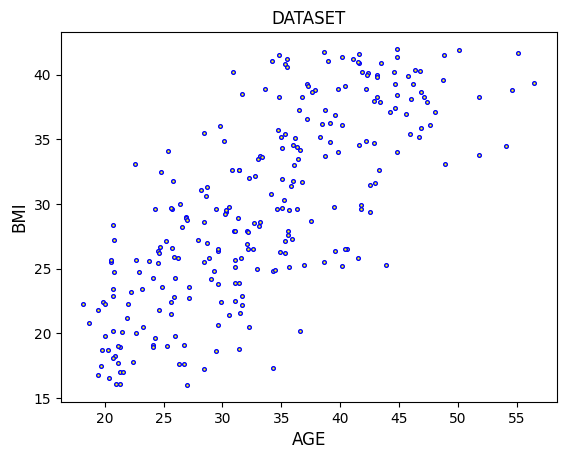

In [37]:
# first import matplotlib
import matplotlib.pyplot as plt

x = data["age"]
y = data["bmi"]

plt.scatter(x, y, c ="yellow",
            linewidths = 1,
            marker =".",
            edgecolor ="blue",
            s = 28)

plt.xlabel("AGE",fontsize=12)
plt.ylabel("BMI",fontsize=12)
plt.title("DATASET",fontsize=12)
plt.show()

## Exercise 18

---


Plot a **bar chart** for average "sport" per "city" using matplotlib [API](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). You can see some practical examples [HERE](https://www.geeksforgeeks.org/bar-plot-in-matplotlib/).

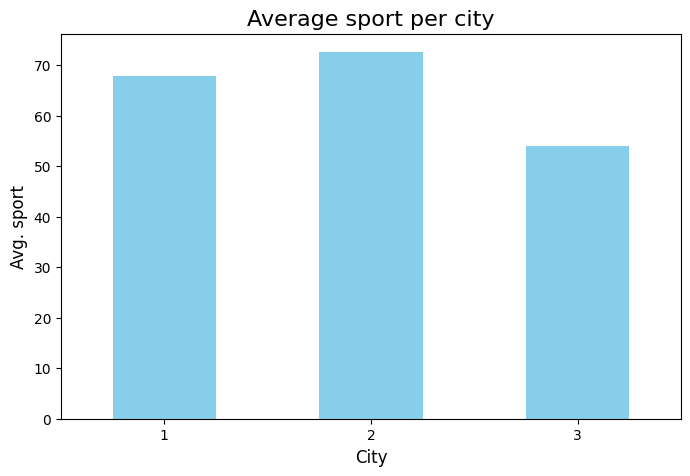

In [52]:
# try to follow the standards of a scientific figure (title, scale,...)
mean_sport_per_city = data2.groupby("city")["sport"].mean()

plt.figure(figsize=(8,5))
mean_sport_per_city.plot(kind="bar", color="skyblue")

# plt.grid(True)
plt.title("Average sport per city", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Avg. sport", fontsize=12)

plt.xticks(rotation=0)
plt.show()


## Exercise 19

---


Plot a **box plot** for "bmi" per "city" to compare results (3 box plots in the one image) using matplotlib [API](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html). You can see some practical examples [HERE](https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/).

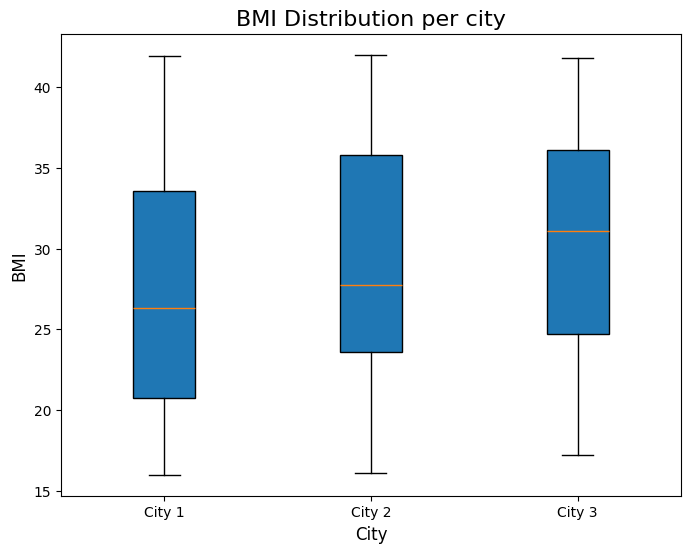

In [42]:
# try to make the colors and fonts legible

plt.figure(figsize=(8,6))
plt.boxplot([city1, city2, city3], patch_artist=True, tick_labels=["City 1", "City 2", "City 3"])

plt.title("BMI Distribution per city", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("BMI", fontsize=12)

plt.show()

# 10.&nbsp;Data Exporting

## Exercise 20

---


Save **box plot** image in **SVG** format using matplotlib [API](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html). You can see practical example [HERE](https://www.geeksforgeeks.org/how-to-save-a-plot-to-a-file-using-matplotlib/). Next, write data after cleaning in **CSV** format  using pandas [API](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html). You can see some practical examples [HERE](https://www.geeksforgeeks.org/saving-a-pandas-dataframe-as-a-csv/).

In [61]:
# choose a meaningful name for the file names.


plt.savefig(r'bmi_boxplot_per_city.svg', format='svg')
data2.to_csv(r'cleaned_bmi_data.csv', index=False)




<Figure size 640x480 with 0 Axes>

Congratulations! You finished this course successfully.

# References and Resources:

1. You can continue your learning through more complex projects in [Kaggle](https://www.kaggle.com/).

2. You can also have access to neuroscience datasets in [CRCNS](https://crcns.org/data-sets).